<a href="https://colab.research.google.com/github/JavohirTF7/machine-learning/blob/main/Toshkent_shahrida_uylarning_narxini_aniqlash(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Toshkent shahrida uylarning narxini aniqlash.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [2]:

df.shape

(7565, 7)

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [3]:
import numpy as np
import matplotlib as plt
import sklearn

In [4]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df['price'].str.len().value_counts()

5     6694
6      750
10      99
4       12
7        7
8        2
1        1
Name: price, dtype: int64

In [7]:
df[df['price'].str.len()==10]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119,3,9,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160,4,9,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105,5,6,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90,6,8,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48,4,4,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.70,3,8,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51,3,4,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208,1,7,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35,2,9,Договорная


In [8]:
j={'Договорная':np.nan}
df=df.replace(j)
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [9]:
df['size'].str.len().value_counts()

2     6127
3     1223
5      185
6       16
4        7
1        6
17       1
Name: size, dtype: int64

In [10]:
df=df.drop(5347)
df=df.drop('location',axis=1)


In [11]:
df['price']=pd.to_numeric(df['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7564 non-null   object 
 1   rooms       7564 non-null   int64  
 2   size        7564 non-null   object 
 3   level       7564 non-null   int64  
 4   max_levels  7564 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 413.7+ KB


In [12]:
df['size']=pd.to_numeric(df['size'])

In [13]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [14]:
df['district'].unique()

array(['Юнусабадский', 'Яккасарайский', 'Чиланзарский', 'Учтепинский',
       'Мирзо-Улугбекский', 'Яшнободский', 'Мирабадский',
       'Шайхантахурский', 'Олмазорский', 'Сергелийский', 'Янгихаётский',
       'Бектемирский'], dtype=object)

In [15]:
shahar={
    'Юнусабадский':'Yunusobod', 'Яккасарайский':'Yakkasaroy', 'Чиланзарский':'Chilonzor', 'Учтепинский':'Uchtepa',
       'Мирзо-Улугбекский':'Mirzo-Ulugbek', 'Яшнободский':'Yashnabod', 'Мирабадский':'Mirobod',
       'Шайхантахурский':'Shayxontoxur', 'Олмазорский':'Olmazor', 'Сергелийский':'Sergeli', 'Янгихаётский':'Yangihayot',
       'Бектемирский':'Bektemir'
}

In [16]:
df=df.replace(shahar)

In [17]:
df.isnull().sum()

district       0
rooms          0
size           0
level          0
max_levels     0
price         99
dtype: int64

In [18]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   object 
 1   rooms       7465 non-null   int64  
 2   size        7465 non-null   float64
 3   level       7465 non-null   int64  
 4   max_levels  7465 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 408.2+ KB


In [25]:
df=df.drop('location',axis=1)

KeyError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e3178c750>,
      dtype=object)

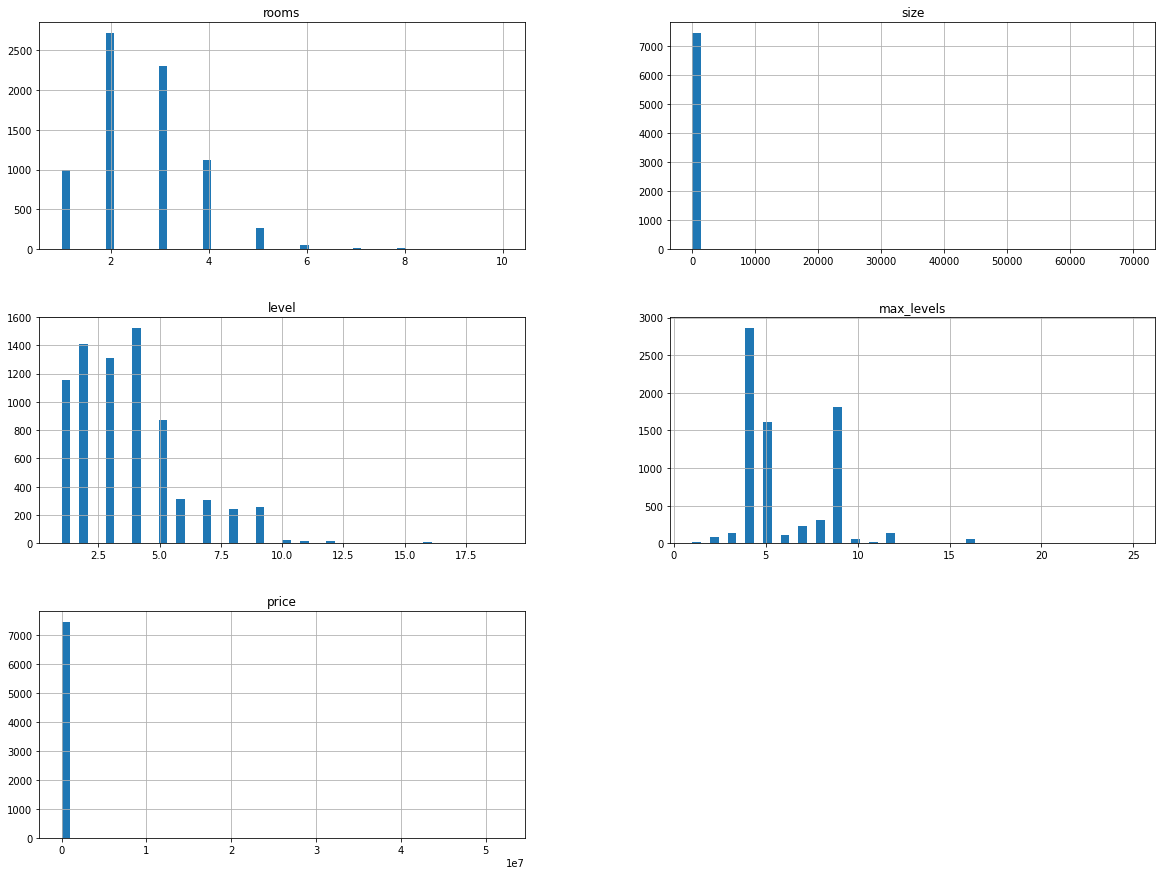

In [26]:
df.hist(bins=50,figsize=(20,15))

In [20]:
df.to_csv("toshkent_uylar.csv",index=False)

In [21]:
df.head()

,district,rooms,size,level,max_levels,price
0,Yunusobod,3,57.0,4,4,52000.0
1,Yakkasaroy,2,52.0,4,5,56000.0
2,Chilonzor,2,42.0,4,4,37000.0
3,Chilonzor,3,65.0,1,4,49500.0
4,Chilonzor,3,70.0,3,5,55000.0


In [22]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=5)

In [33]:
X_num=train_set.drop(['price','district'],axis=1)
X.head(2)

,district,rooms,size,level,max_levels
7005,Yashnabod,2,50.0,2,4
3054,Mirobod,4,170.0,8,9


In [37]:
X_text=train_set[['district']]
X_text.head(3)

,district
7005,Yashnabod
3054,Mirobod
5849,Yunusobod


In [88]:
y=np.asanyarray(train_set[['price']])
y

array([[ 31000.],
       [ 95000.],
       [ 55000.],
       ...,
       [ 36500.],
       [ 42000.],
       [110000.]])

Ordinal encoder

In [40]:
ordinal_encoder=OrdinalEncoder()

In [45]:
X_text_p=ordinal_encoder.fit_transform(X_text)

In [46]:
X_text_p[:10]

array([[10.],
       [ 2.],
       [11.],
       [ 3.],
       [ 7.],
       [ 8.],
       [ 8.],
       [ 1.],
       [ 1.],
       [ 1.]])

Normalizatsiya

In [48]:
standardscaler=StandardScaler()

Pipline sonlar

In [50]:
from sklearn.pipeline import Pipeline

In [52]:
from sklearn.compose import ColumnTransformer # Pipelinenni malumotlarni bo'lish

X_n=list(X_num)
X_t = ['district']

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), X_n),
    ('cat', OrdinalEncoder(), X_t)
])

In [87]:
x_prep=full_pipeline.fit_transform(X)


In [55]:
x_prep[:5]

array([[-5.70077285e-01, -4.06884251e-02, -7.61247825e-01,
        -7.76417724e-01,  1.00000000e+01],
       [ 1.27069133e+00,  4.50660130e-02,  1.91822487e+00,
         1.14182100e+00,  2.00000000e+00],
       [ 1.27069133e+00, -1.99644359e-02, -7.61247825e-01,
        -7.76417724e-01,  1.10000000e+01],
       [ 1.27069133e+00,  2.18879396e-03,  1.31909741e-01,
        -9.12223372e-03,  3.00000000e+00],
       [ 3.50307020e-01, -2.85398797e-02, -7.61247825e-01,
        -3.92769979e-01,  7.00000000e+00]])

Linear REgression

In [77]:
y_test=np.asanyarray(test_set[["price"]])
X_tes=test_set.drop(['price'],axis=1)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
LR_model=LinearRegression()

In [69]:
LR_model.fit(x_prep,y)

LinearRegression()

In [78]:
X_tes_prep=full_pipeline.fit_transform(X_tes)

In [81]:
y_predict=LR_model.predict(X_tes_prep)
y_predict

array([[ 36373.34525614],
       [ 18571.41852344],
       [ 89016.19207433],
       ...,
       [ 70402.23870153],
       [175015.02716718],
       [ 79277.36366946]])

In [82]:
from sklearn.metrics import mean_absolute_error
MSE=mean_absolute_error(y_test,y_predict)

In [83]:
MSE

30662.445747739825

In [89]:

rf_model=RandomForestClassifier()

rf_model.fit(x_prep,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [90]:
y_pred=rf_model.predict(X_tes_prep)

In [97]:
y_pred[:10]

array([31500., 32000., 65000., 45000., 38500., 36500., 68000., 34000.,
       56000., 41000.])

In [98]:
y_test[:10]

array([[35000.],
       [36000.],
       [41000.],
       [45000.],
       [40000.],
       [34800.],
       [70000.],
       [30000.],
       [51500.],
       [40000.]])

In [94]:
MSE=mean_absolute_error(y_test,y_pred)
MSE

128255.05559276624